<a href="https://colab.research.google.com/github/mukulsh98/My_Jupiter_Notebooks/blob/mukulsh98-patch-1/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


url='https://raw.githubusercontent.com/raj-shah14/Predicting-Google-Stock-Prices/master/Google_Stock_Price_Train.csv'
df1 = pd.read_csv(url)
df1.head(10)

,date,open,high,low,close,volume
0,1/28/2008,288.4226,289.0636,277.1225,280.8505,5804803
1,1/29/2008,283.1186,283.5530,273.1167,278.0924,6276985
2,1/30/2008,277.4205,283.0984,274.5513,276.9558,7929224
3,1/31/2008,272.2782,289.4480,269.8939,285.0533,14571660
4,2/1/2008,267.0550,271.0961,257.6239,260.6043,17589740
5,2/4/2008,257.1541,259.0282,248.8091,250.2639,13157040
6,2/5/2008,247.2331,257.1188,246.7734,256.0072,11201620
7,2/6/2008,258.1998,258.2149,251.5268,253.4362,7626121
8,2/7/2008,250.9863,259.7405,249.9255,255.0729,7928354
9,2/8/2008,257.3259,261.5287,256.9672,261.0033,6828632


In [2]:
df1.drop(["date","high","low","close","volume"],axis=1,inplace=True)
df1.head(10)


,open
0,288.4226
1,283.1186
2,277.4205
3,272.2782
4,267.0550
5,257.1541
6,247.2331
7,258.1998
8,250.9863
9,257.3259


In [10]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range =(0, 1))
scaled_data=sc.fit_transform(df1)
print (scaled_data)



[[0.21311385]
 [0.20585947]
 [0.19806607]
 ...
 [0.9985639 ]
 [0.99600626]
 [1.        ]]


In [0]:
# data structure with 60 timesteps and 1 output
X_train=[]
y_train=[]

for i in range(60,len(scaled_data)):
  X_train.append(scaled_data[i-60:i,0])
  y_train.append(scaled_data[i,0])
X_train , y_train= np.array(X_train) , np.array(y_train)

  

In [18]:
# Reshaping
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

# Building RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





2239/2239 [==============================] - 17s 7ms/step - loss: 0.0240
Epoch 2/100
2239/2239 [==============================] - 14s 6ms/step - loss: 0.0033
Epoch 3/100
2239/2239 [==============================] - 14s 6ms/step - loss: 0.0034
Epoch 4/100
2239/2239 [==============================] - 14s 6ms/step - loss: 0.0030
Epoch 5/100
2239/2239 [==============================] - 14s 6ms/step - loss: 0.0030
Epoch 6/100
2239/2239 [==============================] - 14s 6ms/step - loss: 0.0031
Epoch 7/100
2239/2239 [==============================] - 14s 6ms/step - loss: 0.0030
Epoch 8/100
2239/2239 [==============================] - 14s 6ms/step - loss: 0.0025
Epoch 9/100
2239/2239 [==============================] - 14s 6ms/step - loss: 0.0025
Epoch 10/100
2239/2239 [==============================] - 14s 6ms/step - loss: 0.0023
Epoch 11/100
2239/2239 [======================

In [30]:

url='https://raw.githubusercontent.com/Parasgr7/Google-Stock-Price-Prediction/master/Google_Stock_Price_Test.csv'
df2=pd.read_csv(url)
df2.head(30)




,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [29]:
url='https://raw.githubusercontent.com/raj-shah14/Predicting-Google-Stock-Prices/master/Google_Stock_Price_Train.csv'
df3 = pd.read_csv(url)
df3.head()

,date,open,high,low,close,volume
0,1/28/2008,288.4226,289.0636,277.1225,280.8505,5804803
1,1/29/2008,283.1186,283.5530,273.1167,278.0924,6276985
2,1/30/2008,277.4205,283.0984,274.5513,276.9558,7929224
3,1/31/2008,272.2782,289.4480,269.8939,285.0533,14571660
4,2/1/2008,267.0550,271.0961,257.6239,260.6043,17589740


In [0]:
dataset_tot= pd.concat((df3['open'],df2['Open']), axis=0)

inputs = dataset_tot[len(dataset_tot) - len(df2) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

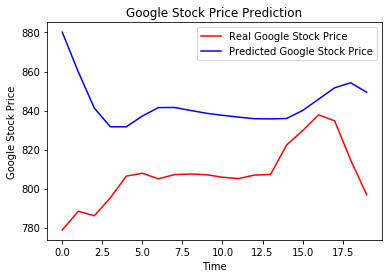

In [40]:
real_stock_price=df2.iloc[:, 1:2].values

import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()